In [3]:
import pandas as pd
import numpy as np
import ipaddress
import dns.resolver
import dns.reversename
import pygeoip
import matplotlib.pyplot as plt 

datafile='data5.parquet'

### IP geolocalization
gi=pygeoip.GeoIP('./GeoIP.dat')
gi2=pygeoip.GeoIP('./GeoIPASNum.dat')
addr='193.136.73.21'
cc=gi.country_code_by_addr(addr)
org=gi2.org_by_addr(addr)
print(cc,org)

### DNS resolution
addr=dns.resolver.resolve("www.ua.pt", 'A')
for a in addr:
    print(a)
    
### Reverse DNS resolution    
name=dns.reversename.from_address("193.136.172.20")
addr=dns.resolver.resolve(name, 'PTR')
for a in addr:
    print(a)

### Read parquet data files
data=pd.read_parquet(datafile)

# truncate the data to the first 1000 packets
# data=data.head(1000)

# give me all the columns that are available
print(data.columns)

#print(data.to_string())

# Number of packets per protocol and ports, and is source CC
# nP=data.groupby(['proto','port'])['up_bytes'].count()
# nP=data.groupby(['proto','port'])['up_bytes'].count().to_frame(name='nP')
# nP=data.groupby(['proto','port'])['up_bytes'].count().reset_index(name='nP')
# nP=data.groupby(['proto','port'])['up_bytes'].count().reset_index(name='nP').sort_values(by=['nP'],ascending=False)

# # Give me a table of unique source IPs, with the number of packets sent by each one
# uniqIP=data.groupby(['src_ip'])['up_bytes'].count().reset_index(name='nP').sort_values(by=['nP'],ascending=False)

# # Table with the number of packets exchanged between each pair of IPs
# nPbetIPs=data.groupby(['src_ip','dst_ip'])['up_bytes'].count().reset_index(name='nP').sort_values(by=['nP'],ascending=False)

# # Calc the min, max, avg, std dev of the number of packets for category of src_ip, dst_ip, proto, port
# nPbetIPs=data.groupby(['src_ip','dst_ip','proto','port'])['up_bytes'].count().reset_index(name='nP').sort_values(by=['nP'],ascending=False)

# # graph with the number of packets exchanged between each pair of IPs
# nPbetIPs=data.groupby(['src_ip','dst_ip'])['up_bytes'].count().reset_index(name='nP').sort_values(by=['nP'],ascending=False)

# In the same table put the max, min, avg, std dev of the number of packets exchanged
Statistics=data.groupby(['src_ip','dst_ip'])['up_bytes'].agg(['count','min','max','mean','std']).reset_index().sort_values(by=['count'],ascending=False)

# for each source IP, give me the max number of packets sent to any destination IP
# maxP=data.groupby(['src_ip'])['up_bytes'].max().reset_index(name='maxP').sort_values(by=['maxP'],ascending=False)

# # for each source IP, give me the minimum number of packets sent to any destination IP, and the destination IP
# minP=data.groupby(['src_ip'])['up_bytes'].min().reset_index(name='minP').sort_values(by=['minP'],ascending=False)

# # for each source IP, give me the average number of packets sent to any destination IP
# avgP=data.groupby(['src_ip'])['up_bytes'].mean().reset_index(name='avgP').sort_values(by=['avgP'],ascending=False)

# # calculate from data the max number of packets sent to any destination IP
# maxPack=data['up_bytes'].max()
# maxPackDown=data['down_bytes'].max()

# minPack=data['up_bytes'].min()
# minPackDown=data['down_bytes'].min()

# avgPack=data['up_bytes'].mean()
# avgPackDown=data['down_bytes'].mean()

# uniquelocations=data['dst_ip'].unique()

#return all the cc
# cc=data['dst_ip'].apply(lambda y:gi.country_code_by_addr(y)).to_frame(name='cc')

#return all the org
org=data['dst_ip'].apply(lambda y:gi2.org_by_addr(y)).to_frame(name='org')

sum_packets_by_org=org.groupby(['org'])['org'].count().reset_index(name='count').sort_values(by=['count'],ascending=False)









# #Just the UDP flows
# udpF=data.loc[data['proto']=='udp']

# #Number of UDP flows for each source IP
# nudpF=data.loc[data['proto']=='udp'].groupby(['src_ip'])['up_bytes'].count()

# #Number of UDP flows to port 443, for each source IP
# nudpF443=data.loc[(data['proto']=='udp')&(data['port']==443)].groupby(['src_ip'])['up_bytes'].count()

# #Average number of downloaded bytes, per flow, for each source IP
# avgUp=data.groupby(['src_ip'])['down_bytes'].mean()


# #Total uploaded bytes to destination port 443, for each source IP, ordered from larger amount to lowest amount
# upS=data.loc[((data['port']==443))].groupby(['src_ip'])['up_bytes'].sum().sort_values(ascending=False)

# #Histogram of the total uploaded bytes to destination port 443, by source IP
# upS=data.loc[((data['port']==443))].groupby(['src_ip'])['up_bytes'].sum().hist()
# plt.show()

# #Is destination IPv4 a public address?
# NET=ipaddress.IPv4Network('192.168.100.0/24')
# bpublic=data.apply(lambda x: ipaddress.IPv4Address(x['dst_ip']) not in NET,axis=1)

# #Geolocalization of public destination adddress
# cc=data[bpublic]['dst_ip'].apply(lambda y:gi.country_code_by_addr(y)).to_frame(name='cc')




PT AS1930 Fundacao para a Ciencia e a Tecnologia, I.P.
193.136.173.58
dns.ua.pt.
Index(['timestamp', 'src_ip', 'dst_ip', 'proto', 'port', 'up_bytes',
       'down_bytes'],
      dtype='object')


Verificação dos dados das tabelas

In [11]:
import pandas as pd
import numpy as np
import ipaddress
import dns.resolver
import dns.reversename
import pygeoip
import matplotlib.pyplot as plt 

datafile='data5.parquet'

### IP geolocalization
gi=pygeoip.GeoIP('./GeoIP.dat')
gi2=pygeoip.GeoIP('./GeoIPASNum.dat')
addr='193.136.73.21'
cc=gi.country_code_by_addr(addr)
org=gi2.org_by_addr(addr)
print(cc,org)

### DNS resolution
addr=dns.resolver.resolve("www.ua.pt", 'A')
for a in addr:
    print(a)
    
### Reverse DNS resolution    
name=dns.reversename.from_address("193.136.172.20")
addr=dns.resolver.resolve(name, 'PTR')
for a in addr:
    print(a)

### Read parquet data files
data=pd.read_parquet(datafile)

# Verify if all the data is right by identifying the columns if timestamp is allways an integer
print(data.dtypes)
# for all the rows of timestamp, verify if all the values are integer and if not, print the row
for index, row in data.iterrows():
    if not isinstance(row['timestamp'], int):
        print(index, row['timestamp'])

# verify if all the values of the column proto are either tcp or udp
print(data['proto'].unique())

# verify if all the values of the column port are either 443 or 80
print(data['port'].unique())

# verify if all the values of the column src_ip are consistent with the IPv4 format
for index, row in data.iterrows():
    try:
        ipaddress.IPv4Address(row['src_ip'])
    except ipaddress.AddressValueError:
        print(index, row['src_ip'])

# verify if all the values of the column dst_ip are consistent with the IPv4 format
for index, row in data.iterrows():
    try:
        ipaddress.IPv4Address(row['dst_ip'])
    except ipaddress.AddressValueError:
        print(index, row['dst_ip'])





PT AS1930 Fundacao para a Ciencia e a Tecnologia, I.P.
193.136.173.58
dns.ua.pt.
timestamp      int64
src_ip        object
dst_ip        object
proto         object
port           int64
up_bytes       int64
down_bytes     int64
dtype: object


Volume de tráfego:

----up_bytes-----

In [19]:
import pandas as pd
import numpy as np
import ipaddress
import dns.resolver
import dns.reversename
import pygeoip
import matplotlib.pyplot as plt 

datafile='data5.parquet'

### IP geolocalization
gi=pygeoip.GeoIP('./GeoIP.dat')
gi2=pygeoip.GeoIP('./GeoIPASNum.dat')
addr='193.136.73.21'
cc=gi.country_code_by_addr(addr)
org=gi2.org_by_addr(addr)
print(cc,org)

### DNS resolution
addr=dns.resolver.resolve("www.ua.pt", 'A')
for a in addr:
    print(a)
    
### Reverse DNS resolution    
name=dns.reversename.from_address("193.136.172.20")
addr=dns.resolver.resolve(name, 'PTR')
for a in addr:
    print(a)

### Read parquet data files
data=pd.read_parquet(datafile)

# Volume of traffic per Upload
# Average number of uploaded bytes per flow

# Sum all the up_bytes in the column up_bytes
sumUpBytes=data['up_bytes'].sum()
print(sumUpBytes)

# Calculate the average of the up_bytes in the column up_bytes
avgUpBytes=data['up_bytes'].mean()
print(avgUpBytes)

# Calculate the median of the up_bytes in the column up_bytes
medianUpBytes=data['up_bytes'].median()
print(medianUpBytes)

# Calculate the standard deviation of the up_bytes in the column up_bytes
stdUpBytes=data['up_bytes'].std()
print(stdUpBytes)







PT AS1930 Fundacao para a Ciencia e a Tecnologia, I.P.
193.136.173.58
dns.ua.pt.
9750779128
10063.502467167222
9145.0
6911.42397224253


Volume de tráfego:

----Down_bytes----

In [21]:
import pandas as pd
import numpy as np
import ipaddress
import dns.resolver
import dns.reversename
import pygeoip
import matplotlib.pyplot as plt 

datafile='data5.parquet'

### IP geolocalization
gi=pygeoip.GeoIP('./GeoIP.dat')
gi2=pygeoip.GeoIP('./GeoIPASNum.dat')
addr='193.136.73.21'
cc=gi.country_code_by_addr(addr)
org=gi2.org_by_addr(addr)
print(cc,org)

### DNS resolution
addr=dns.resolver.resolve("www.ua.pt", 'A')
for a in addr:
    print(a)
    
### Reverse DNS resolution    
name=dns.reversename.from_address("193.136.172.20")
addr=dns.resolver.resolve(name, 'PTR')
for a in addr:
    print(a)

### Read parquet data files
data=pd.read_parquet(datafile)

# Volume of traffic per Download
# Average number of downloaded bytes per flow

# Sum all the down_bytes in the column down_bytes
sumDownBytes=data['down_bytes'].sum()
print(sumDownBytes)

# Calculate the average of the down_bytes in the column down_bytes
avgDownBytes=data['down_bytes'].mean()
print(avgDownBytes)

# Calculate the median of the down_bytes in the column down_bytes
medianDownBytes=data['down_bytes'].median()
print(medianDownBytes)

# Calculate the standard deviation of the down_bytes in the column down_bytes
stdDownBytes=data['down_bytes'].std()
print(stdDownBytes)



PT AS1930 Fundacao para a Ciencia e a Tecnologia, I.P.
193.136.173.58
dns.ua.pt.
89859159562
92741.08889955362
75847.0
144198.67015170382


Ips destino/Ips base mais comuns

PT AS1930 Fundacao para a Ciencia e a Tecnologia, I.P.
193.136.173.58
dns.ua.pt.


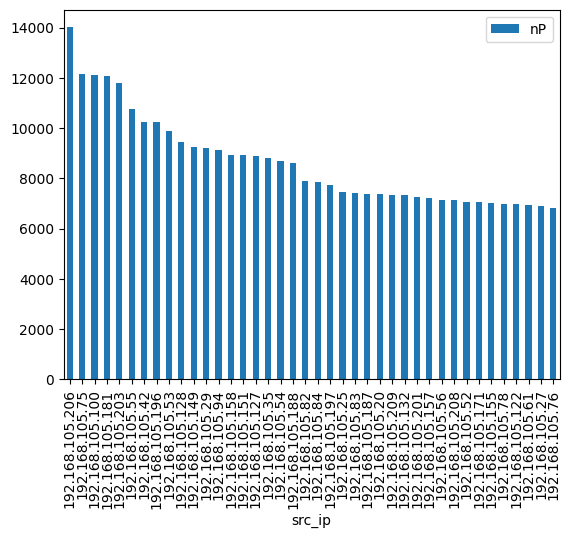

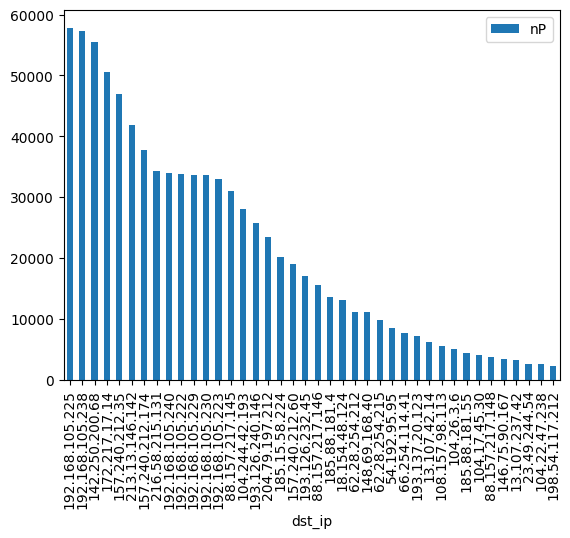

In [29]:
import pandas as pd
import numpy as np
import ipaddress
import dns.resolver
import dns.reversename
import pygeoip
import matplotlib.pyplot as plt 

datafile='data5.parquet'

### IP geolocalization
gi=pygeoip.GeoIP('./GeoIP.dat')
gi2=pygeoip.GeoIP('./GeoIPASNum.dat')
addr='193.136.73.21'
cc=gi.country_code_by_addr(addr)
org=gi2.org_by_addr(addr)
print(cc,org)

### DNS resolution
addr=dns.resolver.resolve("www.ua.pt", 'A')
for a in addr:
    print(a)
    
### Reverse DNS resolution    
name=dns.reversename.from_address("193.136.172.20")
addr=dns.resolver.resolve(name, 'PTR')
for a in addr:
    print(a)

### Read parquet data files
data=pd.read_parquet(datafile)

#Tabela com os ips de origem e o numero de pacotes enviados por cada um
# Table with the source IPs and the number of packets sent by each one
nP=data.groupby(['src_ip'])['up_bytes'].count().reset_index(name='nP').sort_values(by=['nP'],ascending=False)

# put it in a bar graph only the first 40
nP.head(40).plot.bar(x='src_ip',y='nP')
plt.show()

#Tabela com os ips de destino e o numero de pacotes enviados para cada um
# Table with the destination IPs and the number of packets sent to each one
nP_dest=data.groupby(['dst_ip'])['up_bytes'].count().reset_index(name='nP').sort_values(by=['nP'],ascending=False)

# put it in a bar graph only the first 40
nP_dest.head(40).plot.bar(x='dst_ip',y='nP')
plt.show()



Gráfico de Area para mostrar o trafego ao longo do tempo

PT AS1930 Fundacao para a Ciencia e a Tecnologia, I.P.
193.136.173.58
dns.ua.pt.


<AxesSubplot: xlabel='timestamp'>

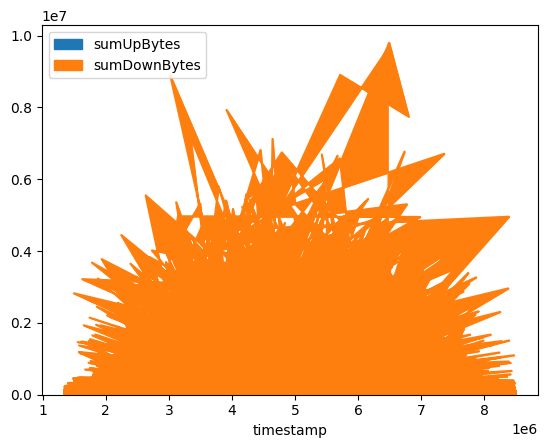

In [31]:
import pandas as pd
import numpy as np
import ipaddress
import dns.resolver
import dns.reversename
import pygeoip
import matplotlib.pyplot as plt 

datafile='data5.parquet'

### IP geolocalization
gi=pygeoip.GeoIP('./GeoIP.dat')
gi2=pygeoip.GeoIP('./GeoIPASNum.dat')
addr='193.136.73.21'
cc=gi.country_code_by_addr(addr)
org=gi2.org_by_addr(addr)
print(cc,org)

### DNS resolution
addr=dns.resolver.resolve("www.ua.pt", 'A')
for a in addr:
    print(a)
    
### Reverse DNS resolution    
name=dns.reversename.from_address("193.136.172.20")
addr=dns.resolver.resolve(name, 'PTR')
for a in addr:
    print(a)

### Read parquet data files
data=pd.read_parquet(datafile)

# Area graph to show the volume of traffic along the day
# Group the data by timestamp and sum the up_bytes
sumUpBytes=data.groupby(['timestamp'])['up_bytes'].sum().reset_index(name='sumUpBytes').sort_values(by=['sumUpBytes'],ascending=False)

# Group the data by timestamp and sum the down_bytes
sumDownBytes=data.groupby(['timestamp'])['down_bytes'].sum().reset_index(name='sumDownBytes').sort_values(by=['sumDownBytes'],ascending=False)

# Merge the two tables
sumBytes=sumUpBytes.merge(sumDownBytes, on='timestamp')

# Plot the graph
sumBytes.plot.area(x='timestamp',y=['sumUpBytes','sumDownBytes'])



Pie chart para mostrar a o trafego de download vs upload

PT AS1930 Fundacao para a Ciencia e a Tecnologia, I.P.
193.136.173.58
dns.ua.pt.


<AxesSubplot: ylabel='sumBytes'>

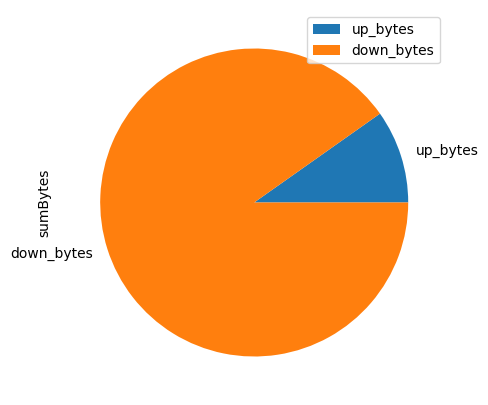

In [38]:
import pandas as pd
import numpy as np
import ipaddress
import dns.resolver
import dns.reversename
import pygeoip
import matplotlib.pyplot as plt 

datafile='data5.parquet'

### IP geolocalization
gi=pygeoip.GeoIP('./GeoIP.dat')
gi2=pygeoip.GeoIP('./GeoIPASNum.dat')
addr='193.136.73.21'
cc=gi.country_code_by_addr(addr)
org=gi2.org_by_addr(addr)
print(cc,org)

### DNS resolution
addr=dns.resolver.resolve("www.ua.pt", 'A')
for a in addr:
    print(a)
    
### Reverse DNS resolution    
name=dns.reversename.from_address("193.136.172.20")
addr=dns.resolver.resolve(name, 'PTR')
for a in addr:
    print(a)

### Read parquet data files
data=pd.read_parquet(datafile)

# Show in a pie chart the percentange of downloaded and uploaded bytes
# Sum all the up_bytes in the column up_bytes
sumUpBytes=data['up_bytes'].sum()

# Sum all the down_bytes in the column down_bytes
sumDownBytes=data['down_bytes'].sum()

# Create a table with the sum of the up_bytes and down_bytes
sumBytes=pd.DataFrame({'sumBytes':[sumUpBytes,sumDownBytes]},index=['up_bytes','down_bytes'])

# Plot the pie chart
sumBytes.plot.pie(y='sumBytes',figsize=(5, 5))







PT AS1930 Fundacao para a Ciencia e a Tecnologia, I.P.
193.136.173.58
dns.ua.pt.


<AxesSubplot: xlabel='timestamp'>

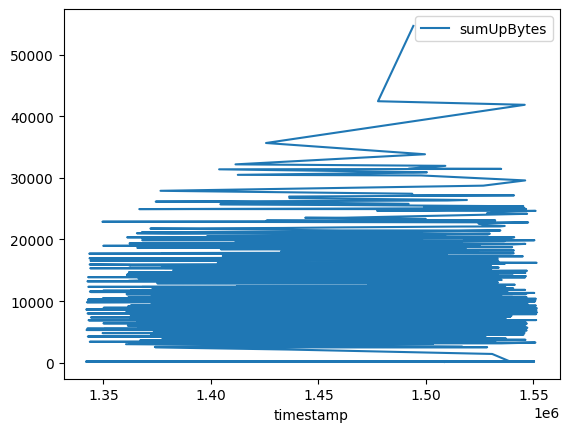

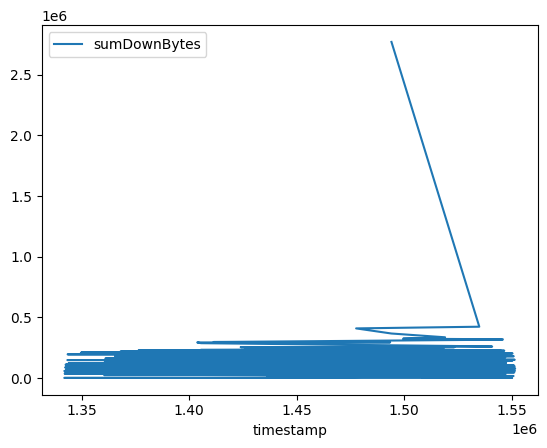

In [2]:
import pandas as pd
import numpy as np
import ipaddress
import dns.resolver
import dns.reversename
import pygeoip
import matplotlib.pyplot as plt 

datafile='data5.parquet'

### IP geolocalization
gi=pygeoip.GeoIP('./GeoIP.dat')
gi2=pygeoip.GeoIP('./GeoIPASNum.dat')
addr='193.136.73.21'
cc=gi.country_code_by_addr(addr)
org=gi2.org_by_addr(addr)
print(cc,org)

### DNS resolution
addr=dns.resolver.resolve("www.ua.pt", 'A')
for a in addr:
    print(a)
    
### Reverse DNS resolution    
name=dns.reversename.from_address("193.136.172.20")
addr=dns.resolver.resolve(name, 'PTR')
for a in addr:
    print(a)

### Read parquet data files
data=pd.read_parquet(datafile)

# compute only the first 1000 packets
data=data.head(1000)

# Line graph to show the volume of uploaded bytes along the day
# Group the data by timestamp and sum the up_bytes
sumUpBytes=data.groupby(['timestamp'])['up_bytes'].sum().reset_index(name='sumUpBytes').sort_values(by=['sumUpBytes'],ascending=False)

# Plot the graph
sumUpBytes.plot.line(x='timestamp',y='sumUpBytes')

# Line graph to show the volume of downloaded bytes along the day
# Group the data by timestamp and sum the down_bytes
sumDownBytes=data.groupby(['timestamp'])['down_bytes'].sum().reset_index(name='sumDownBytes').sort_values(by=['sumDownBytes'],ascending=False)

# Plot the graph
sumDownBytes.plot.line(x='timestamp',y='sumDownBytes')


